In [11]:
import os
import subprocess
from importlib import reload
os.chdir('/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD')

%matplotlib inline 

import mycode
reload(mycode);

In [12]:
import fitsio as fits
import matplotlib.pyplot as plt 
import numpy as np

# Simulate the whole square degree. 

In [8]:
cmd = "bsub -W 00:50 -o output.txt -r '{} --image-width 3000 --image-height 3000 --dec-center 0 --ra-center 0 --no-analysis \
--catalog-name params/OneDegSq.fits --output-name test{}i.fits --verbose --no-stamps --filter-band i' "

sim1 = "WeakLensingDeblending/simulate.py"
sim2 = "WeakLensingDeblending1/simulate.py"

In [9]:
subprocess.run(cmd.format(sim1, "1"), shell=True);

In [10]:
subprocess.run(cmd.format(sim2, "2"), shell=True);

# read images 

In [27]:
arr1 = fits.read("test1r.fits")
arr2 = fits.read("test2r.fits")


In [28]:
print(np.min(arr1-arr2))
print(np.max(arr1-arr2))

0.0
0.0


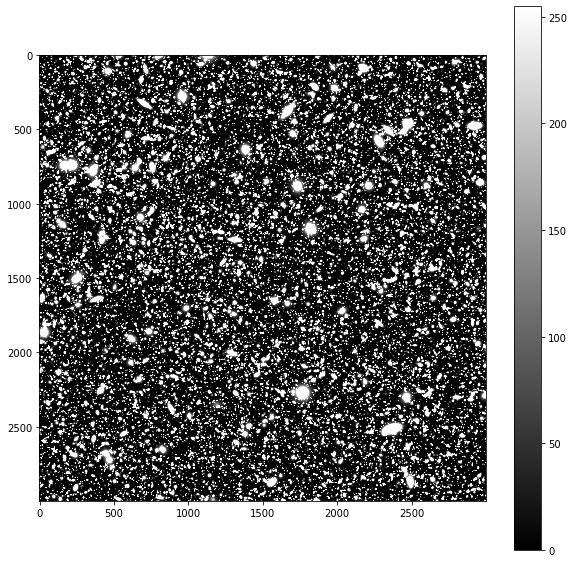

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(arr1, cmap='gray', vmin=0, vmax=255)
plt.colorbar()

In [17]:
plt.imsave("image1.png", arr1, cmap='gray', vmin=0, vmax=255)